In [71]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt

In [59]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train/255.
x_test = x_test/255.

In [60]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [61]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [62]:
# input_img  = tf.keras.Input(shape=(28,28,1))

# x = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(input_img)
# x = tf.keras.layers.MaxPooling2D((2,2), padding="same")(x)
# x = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)
# x = tf.keras.layers.MaxPooling2D((2,2), padding="same")(x)
# x = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)
# encoded = tf.keras.layers.MaxPooling2D((2,2), padding="same")(x)

# x = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(encoded)
# x = tf.keras.layers.UpSampling2D((2,2))(x)
# x = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)
# x = tf.keras.layers.UpSampling2D((2,2))(x)
# x = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)
# x = tf.keras.layers.UpSampling2D((2,2))(x)
# decoded = tf.keras.layers.Conv2D(1, (3,3), activation="sigmoid", padding="same")(x)

In [63]:
input_img = Input(shape=(28,28,1))
x = Conv2D(32, (3,3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2,2),padding="same")(x)
x = Conv2D(32, (3,3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2,2), padding="same")(x)

x = Conv2D(32, (3,3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation="relu", padding="same")(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3), activation="sigmoid", padding="same")(x)

In [64]:
autoencoder = tf.keras.Model(input_img, decoded)

In [65]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [73]:
# !tensorboard --logdir=/tmp/autoencder

^C


In [67]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [74]:
# tensorboard is used for plotting graphs of metrics 
autoencoder.fit(x_train, x_train, epochs=10, batch_size=64, shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir="/tmp/autoencder")])

Epoch 1/10
938/938 [==============================] - 171s 182ms/step - loss: 0.0705 - val_loss: 0.0689
Epoch 2/10
938/938 [==============================] - 176s 187ms/step - loss: 0.0687 - val_loss: 0.0675
Epoch 3/10
371/938 [==========>...................] - ETA: 1:44 - loss: 0.0680

KeyboardInterrupt: 

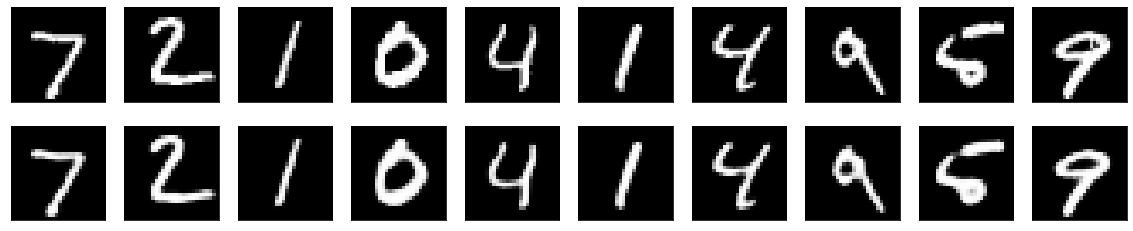

In [75]:
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    # display original Images
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # displaly reconstructed Images
    ax = plt.subplot(2,n,n+i+1)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()